In [1]:
import pandas as pd
import json
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
with open("../output/output.json") as f:
    data = json.load(f)

for k,v in data.items():
    if v.get("P1") == None: 
        print(k)
    if v.get("P2") == None:
        print(k)

data_p1 = {k: v.get("P1", {}) for k,v in data.items() if v.get("P2") is not None and v.get("P1") is not None}
data_p2 = {k: v.get("P2", {}) for k,v in data.items() if v.get("P2") is not None and v.get("P1") is not None}
df_p1 = pd.DataFrame.from_dict(data_p1, orient='index')
df_p2 = pd.DataFrame.from_dict(data_p2, orient='index')
column_names = df_p1.columns
df_p1.rename({name: "P1 "+ name for name in df_p1.columns}, axis=1, inplace=True)
df_p2.rename({name: "P2 "+ name for name in df_p2.columns}, axis=1, inplace=True)

S192
S121
S86
S158
S35
S199
S177
S202
S43
S95
S78
S182
S168


In [3]:
df_concat = pd.concat([df_p1, df_p2], axis=1)
# df_concat.to_excel("../output/output1.xlsx")
print(column_names)
df_concat.head()
# df_concat[df_concat.columns] = MinMaxScaler().fit_transform(df_concat[df_concat.columns])

Index(['lines of code', '# single comments', '# block comments',
       '# block comment lines', 'avg comment lines', 'avg line length',
       'max line length', 'avg identifers per line', 'avg '(' and '{'',
       'avg '.''],
      dtype='object')


,P1 lines of code,P1 # single comments,P1 # block comments,P1 # block comment lines,P1 avg comment lines,P1 avg line length,P1 max line length,P1 avg identifers per line,P1 avg '(' and '{',P1 avg '.',P2 lines of code,P2 # single comments,P2 # block comments,P2 # block comment lines,P2 avg comment lines,P2 avg line length,P2 max line length,P2 avg identifers per line,P2 avg '(' and '{',P2 avg '.'
S74,492,0.087398,0.006098,0.024390,0.111789,20.617886,90,1.597561,0.632114,0.247967,389,0.061697,0.002571,0.007712,0.069409,20.598972,94,1.586118,0.457584,0.164524
S112,593,0.080944,0.000000,0.000000,0.080944,17.089376,71,1.593592,0.527825,0.300169,348,0.083333,0.000000,0.000000,0.083333,19.686782,152,1.425287,0.428161,0.204023
S17,474,0.160338,0.000000,0.000000,0.160338,26.187764,114,1.795359,0.622363,0.297468,428,0.053738,0.000000,0.000000,0.053738,18.838785,109,1.315421,0.432243,0.200935
S203,270,0.051852,0.000000,0.000000,0.051852,15.985185,67,1.681481,0.448148,0.366667,725,0.028966,0.000000,0.000000,0.028966,19.153103,97,1.707586,0.488276,0.224828
S37,723,0.095436,0.004149,0.012448,0.107884,20.546335,91,1.497925,0.460581,0.322268,350,0.022857,0.000000,0.000000,0.022857,16.722857,94,1.445714,0.491429,0.225714


In [4]:
col_name = "avg line length"
df_concat["P1 " + col_name].describe()

count    206.000000
mean      21.247938
std        4.343985
min       13.207622
25%       18.428279
50%       20.693216
75%       24.055567
max       38.639053
Name: P1 avg line length, dtype: float64

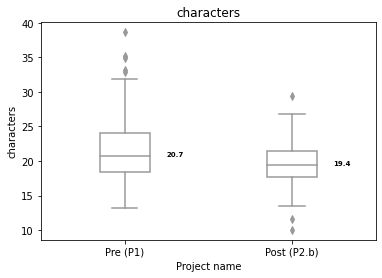

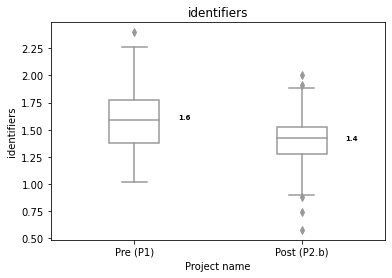

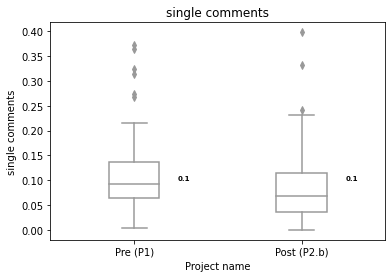

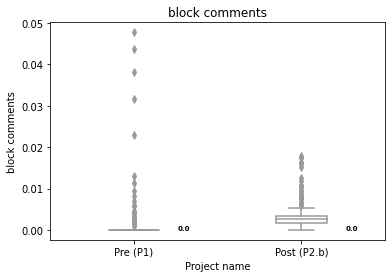

In [18]:
def plot_box_with_labels(img_name, col_name, ylabel):
    box_plot = sns.boxplot([df_concat["P1 " + col_name], df_concat["P2 " + col_name]], width = 0.3, color="white")

    mins = [round(df_concat["P1 " + col_name].describe()["min"],1), round(df_concat["P2 " + col_name].describe()["min"],1)]
    m = [round(df_concat["P1 " + col_name].median(),1), round(df_concat["P2 " + col_name].median(),1)]
    q1 = [round(df_concat["P1 " + col_name].describe()["25%"],1), round(df_concat["P2 " + col_name].describe()["25%"],1)]
    q3 = [round(df_concat["P1 " + col_name].describe()["75%"],1), round(df_concat["P2 " + col_name].describe()["75%"], 1)]
    maxs = [round(df_concat["P1 " + col_name].describe()["max"],1), round(df_concat["P2 " + col_name].describe()["max"],1)]

    for xtick in box_plot.get_xticks():
#         box_plot.text(xtick + 0.3,mins[xtick],mins[xtick] , 
#                 horizontalalignment='center',size='x-small',weight='semibold')
#         box_plot.text(xtick + 0.3,maxs[xtick],maxs[xtick] , 
#                 horizontalalignment='center',size='x-small',weight='semibold')
#         box_plot.text(xtick + 0.3,q1[xtick],q1[xtick] , 
#                 horizontalalignment='center',size='x-small',weight='semibold')
#         box_plot.text(xtick + 0.3,q3[xtick],q3[xtick] , 
#                 horizontalalignment='center',size='x-small',weight='semibold')
        box_plot.text(xtick + 0.3,m[xtick],m[xtick] , 
                horizontalalignment='center',size='x-small',weight='semibold')
    
    box_plot.set(xlabel='Project name', ylabel=ylabel)
    box_plot.set_xticklabels(["Pre (P1)", "Post (P2.b)"])
    box_plot.set(title=ylabel)
    plt.savefig("../output/visualization/"+"_".join(img_name.split()) + "1.svg")
    plt.show()
    plt.close()
        
plot_box_with_labels('avg line length', 'avg line length', 'characters')
plot_box_with_labels('avg identifiers per line', 'avg identifers per line', 'identifiers')
plot_box_with_labels('avg single comments', '# single comments', 'single comments')
plot_box_with_labels('avg block comments', '# block comments', 'block comments')

(206, 20)


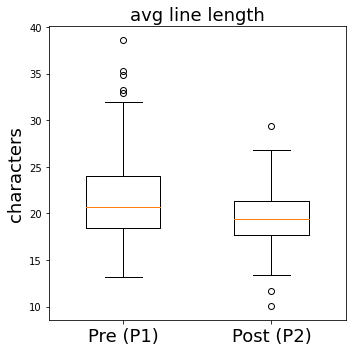

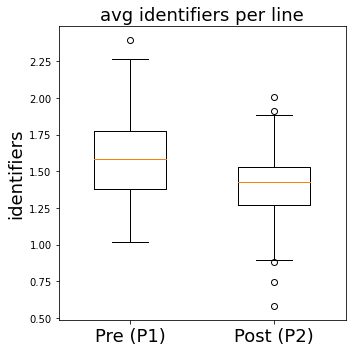

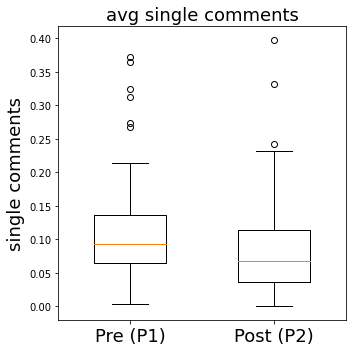

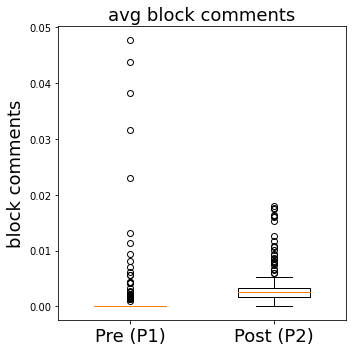

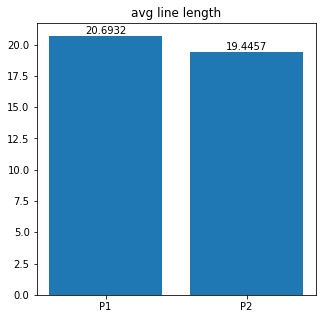

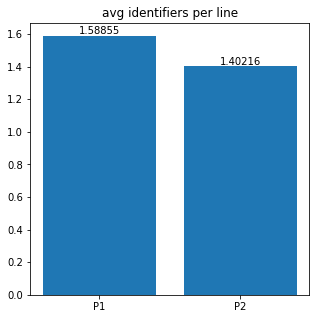

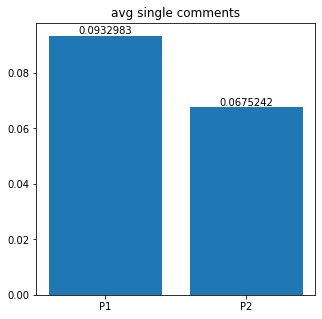

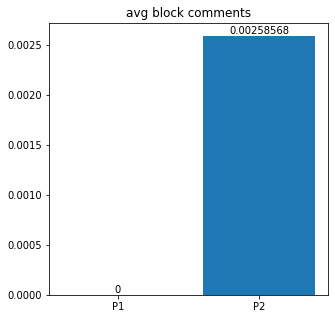

(206, 20)


In [17]:

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def plot_boxplots(img_name):
    nrows, ncols = 2, 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
    for r in range(nrows):
        for c in range(ncols):
            name = column_names[r*ncols+c]
            ax[r,c].boxplot([df_concat["P1 " + name],df_concat["P2 " + name]])
            ax[r,c].set_title(name)
            ax[r,c].set_xticklabels(["P1", "P2"])
    plt.savefig(img_name)

def plot_boxplot(img_name, col_name, ylabel):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.boxplot([df_concat["P1 " + col_name],df_concat["P2 " + col_name]], widths=0.5)
    ax.set_title(img_name, fontsize=18)
    ax.set_xticklabels(["Pre (P1)", "Post (P2)"], fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    plt.tight_layout()
    plt.savefig("../output/visualization/"+"_".join(img_name.split()) + ".svg")
    #plt.savefig("../output/visualization"+"_".join(img_name.split()) + ".jpg")
    plt.show()
    plt.close()

def plot_bar(img_name, col_name):    
    fig, ax = plt.subplots(figsize=(5,5))
    if col_name == "avg identifers per line":
        vals = [df_concat["P1 " + col_name].mean(), df_concat["P2 " + col_name].mean()]
    else:
        vals = [df_concat["P1 " + col_name].median(), df_concat["P2 " + col_name].median()]
    bars = plt.bar(["P1", "P2"], vals)
    plt.title(img_name)
    plt.xticks(["P1", "P2"])
    ax.bar_label(ax.containers[0])
#     for bar in bars:
#         yval = bar.get_height()
#         plt.text(bar.get_x(), yval + .005, yval)
    # plt.tight_layout()
    plt.savefig("../output/visualization/" + "_".join(img_name.split()) + "_bar.svg")
#    plt.savefig("_".join(img_name.split()) + "_bar.jpg")
    
    plt.show()
    plt.close()

print(df_concat.shape)
df_concat.dropna(inplace=True)
#plot_boxplots('boxplots.jpg', ['# single comments', '# block comments', 'avg line length', 'avg identifiers per line'])
plot_boxplot('avg line length', 'avg line length', 'characters')
plot_boxplot('avg identifiers per line', 'avg identifers per line', 'identifiers')
plot_boxplot('avg single comments', '# single comments', 'single comments')
plot_boxplot('avg block comments', '# block comments', 'block comments')

plot_bar('avg line length', 'avg line length')
plot_bar('avg identifiers per line', 'avg identifers per line')
plot_bar('avg single comments', '# single comments')
plot_bar('avg block comments', '# block comments')

print(df_concat.shape)

In [19]:
for col in column_names:
    shapiro_test = stats.shapiro(df_concat["P1 "  + col] - df_concat["P2 " + col])
    print(f'{col:<30} | {shapiro_test.statistic:8.4f} | {shapiro_test.pvalue:.4e} {"normal" if shapiro_test.pvalue > 0.05 else ""}')

lines of code                  |   0.8387 | 7.3863e-14 
# single comments              |   0.9496 | 1.2448e-06 
# block comments               |   0.6113 | 2.3553e-21 
# block comment lines          |   0.7012 | 6.2923e-19 
avg comment lines              |   0.9694 | 1.8745e-04 
avg line length                |   0.9666 | 8.3838e-05 
max line length                |   0.5674 | 2.1843e-22 
avg identifers per line        |   0.9907 | 2.0913e-01 normal
avg '(' and '{'                |   0.9931 | 4.5535e-01 normal
avg '.'                        |   0.9804 | 5.7128e-03 


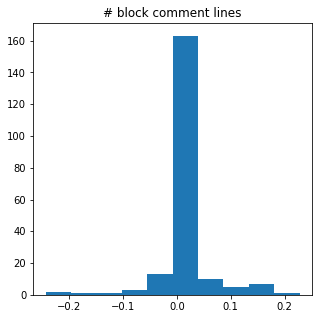

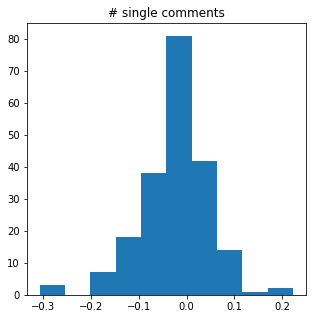

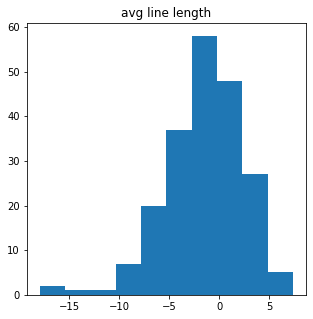

In [6]:
def plot_hist(col_name):    
    fig, ax = plt.subplots(figsize=(5,5))
    vals = [df_concat["P2 " + col_name] - df_concat["P1 " + col_name]]
    plt.title(col_name)
    plt.hist(vals)
other_column_names = ["# block comment lines", "# single comments", "avg line length"]
for name in other_column_names:
    plot_hist(name)

In [7]:
print("wilcoxon")
print("metric                    (P1, P2) medians        p-value    significant")
print("-"*80)
other_column_names = ["# block comment lines", "# single comments", "avg line length"]
for name in other_column_names:
    p1_name, p2_name = "P1 " + name, "P2 " + name
    if name == "avg line length":
        res = stats.wilcoxon(x=df_concat[p2_name], y=df_concat[p1_name], alternative="less")
    else:
        res = stats.wilcoxon(x=df_concat[p2_name], y=df_concat[p1_name], alternative="greater")
    print(f"{name:<25} ({df_concat[p1_name].median():8.4f} {df_concat[p2_name].median():8.4f})     {res.pvalue:.4e} {'*' if res.pvalue < 0.05 else ' '}")
# for name in column_names:
#     p1_name, p2_name = "P1 " + name, "P2 " + name
#     res = stats.wilcoxon(x=df_concat[p1_name], y=df_concat[p2_name])
#     print(f"{name:<25} ({df_concat[p1_name].mean():8.4f} {df_concat[p2_name].mean():8.4f})   {res.pvalue:.4e} {'*' if res.pvalue < 0.05 else ' '}")

wilcoxon
metric                    (P1, P2) medians        p-value    significant
--------------------------------------------------------------------------------
# block comment lines     (  0.0000   0.0153)     3.8974e-16 *
# single comments         (  0.0933   0.0675)     1.0000e+00  
avg line length           ( 20.6932  19.4457)     1.1868e-07 *


In [8]:
print("paired ttest")
print("metric                    P2-P1 means        p-value    significant")
print("-"*80)
for name in ['avg identifers per line', "avg '(' and '{'"]:
    p1_name, p2_name = "P1 " + name, "P2 " + name
    df_copy = pd.DataFrame()
    df_copy[name] = df_concat["P2 " + name] - df_concat["P1 " + name]
    Q1 = df_copy.quantile(q=.25)
    Q3 = df_copy.quantile(q=.75)
    IQR = Q3-Q1
    df_copy = df_copy[~((df_copy < (Q1-1.5*IQR)) | (df_copy > (Q3+1.5*IQR))).any(axis=1)]
    res = stats.ttest_1samp(df_copy, 0, alternative="less")
    print(f"{name:<25} ({df_copy[name].mean():4f})        {res.pvalue[0]:.4e} {'*' if res.pvalue < 0.05 else ' '}")

paired ttest
metric                    P2-P1 means        p-value    significant
--------------------------------------------------------------------------------
avg identifers per line   (-0.179569)        3.7576e-23 *
avg '(' and '{'           (-0.121786)        2.6912e-54 *
